In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=517c848c42266705fab2d5a2b58bc4c8


In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | saint-leu
Processing Record 10 of Set 1 | arlit
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | ladario
Processing Record 14 of Set 1 | zhuhai
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | la ronge
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | tasiilaq
Processi

Processing Record 38 of Set 4 | sitka
Processing Record 39 of Set 4 | umm ruwabah
City not found. Skipping...
Processing Record 40 of Set 4 | bukama
Processing Record 41 of Set 4 | maceio
Processing Record 42 of Set 4 | moree
Processing Record 43 of Set 4 | auburn hills
Processing Record 44 of Set 4 | mackay
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | marcona
City not found. Skipping...
Processing Record 47 of Set 4 | lucapa
Processing Record 48 of Set 4 | iwanai
Processing Record 49 of Set 4 | haines junction
Processing Record 50 of Set 4 | flinders
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | mancio lima
Processing Record 5 of Set 5 | erdenet
Processing Record 6 of Set 5 | tommot
Processing Record 7 of Set 5 | del rio
Processing Record 8 of Set 5 | san cristobal
Processing Record 9 of Set 5 | nanortalik
Processing Record 10 of Set 5 | dicabisaga

Processing Record 24 of Set 8 | sterling
Processing Record 25 of Set 8 | cidreira
Processing Record 26 of Set 8 | georgiyevskoye
Processing Record 27 of Set 8 | havelock
Processing Record 28 of Set 8 | north bend
Processing Record 29 of Set 8 | nuevo progreso
Processing Record 30 of Set 8 | russell
Processing Record 31 of Set 8 | santa cruz
Processing Record 32 of Set 8 | hay river
Processing Record 33 of Set 8 | morro bay
Processing Record 34 of Set 8 | nipawin
Processing Record 35 of Set 8 | lagoa
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | melton
Processing Record 39 of Set 8 | pangai
Processing Record 40 of Set 8 | lebyazhye
Processing Record 41 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 8 | viedma
Processing Record 43 of Set 8 | ozora
Processing Record 44 of Set 8 | darab
Processing Record 45 of Set 8 | faanui
Processing Record 46 of Set 8 | halalo
City not found. Skipping...
Proce

Processing Record 8 of Set 12 | broome
Processing Record 9 of Set 12 | ndjole
Processing Record 10 of Set 12 | naze
Processing Record 11 of Set 12 | charleston
Processing Record 12 of Set 12 | carmen
Processing Record 13 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 14 of Set 12 | guanare
Processing Record 15 of Set 12 | hofn
Processing Record 16 of Set 12 | aykhal
Processing Record 17 of Set 12 | alofi
Processing Record 18 of Set 12 | aleksandrovskoye
Processing Record 19 of Set 12 | novogurovskiy
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | arnedo
Processing Record 22 of Set 12 | noumea
Processing Record 23 of Set 12 | pingliang
Processing Record 24 of Set 12 | abu kamal
Processing Record 25 of Set 12 | clonakilty
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | vilhena
Processing Record 28 of Set 12 | kenai
Processing Record 29 of Set 12 | yulara
Processing Record 30 of Set 12 | yerbogachen
Processing Re

In [21]:
len(city_data)

559

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,53.71,76,75,8.05,CL,2022-02-06 12:31:37
1,Anadyr,64.7500,177.4833,-16.10,83,0,8.95,RU,2022-02-06 12:31:46
2,New Norfolk,-42.7826,147.0587,56.70,52,89,1.41,AU,2022-02-06 12:31:46
3,Mataura,-46.1927,168.8643,45.48,97,0,1.79,NZ,2022-02-06 12:31:47
4,Hobart,-42.8794,147.3294,58.05,80,20,1.99,AU,2022-02-06 12:28:07
5,Tiksi,71.6872,128.8694,-17.97,98,100,3.49,RU,2022-02-06 12:31:47
6,Avarua,-21.2078,-159.7750,71.65,94,40,5.75,CK,2022-02-06 12:31:48
7,Provideniya,64.3833,-173.3000,-3.06,73,0,11.03,RU,2022-02-06 12:31:48
8,Saint-Leu,-21.1500,55.2833,85.06,72,100,1.41,RE,2022-02-06 12:31:49
9,Arlit,18.7369,7.3853,81.99,6,0,5.12,NE,2022-02-06 12:31:49


In [23]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-02-06 12:31:37,-53.1500,-70.9167,53.71,76,75,8.05
1,Anadyr,RU,2022-02-06 12:31:46,64.7500,177.4833,-16.10,83,0,8.95
2,New Norfolk,AU,2022-02-06 12:31:46,-42.7826,147.0587,56.70,52,89,1.41
3,Mataura,NZ,2022-02-06 12:31:47,-46.1927,168.8643,45.48,97,0,1.79
4,Hobart,AU,2022-02-06 12:28:07,-42.8794,147.3294,58.05,80,20,1.99
5,Tiksi,RU,2022-02-06 12:31:47,71.6872,128.8694,-17.97,98,100,3.49
6,Avarua,CK,2022-02-06 12:31:48,-21.2078,-159.7750,71.65,94,40,5.75
7,Provideniya,RU,2022-02-06 12:31:48,64.3833,-173.3000,-3.06,73,0,11.03
8,Saint-Leu,RE,2022-02-06 12:31:49,-21.1500,55.2833,85.06,72,100,1.41
9,Arlit,NE,2022-02-06 12:31:49,18.7369,7.3853,81.99,6,0,5.12


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

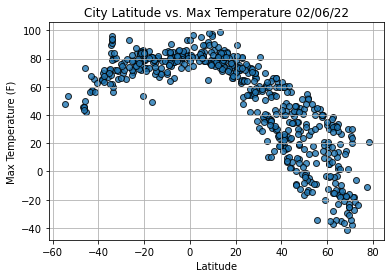

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

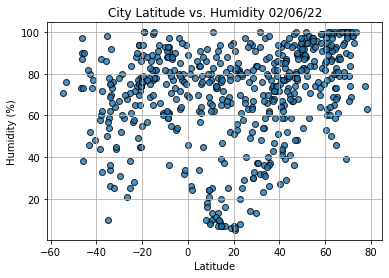

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

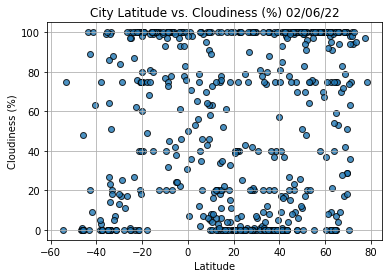

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

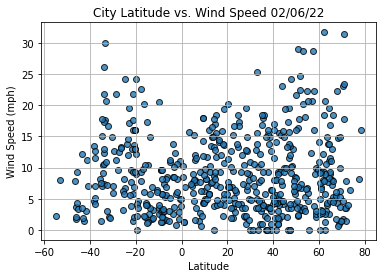

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                       Zhuhai
Country                        CN
Date          2022-02-06 12:31:51
Lat                       22.2769
Lng                      113.5678
Max Temp                    62.98
Humidity                       82
Cloudiness                     40
Wind Speed                   3.44
Name: 13, dtype: object

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Anadyr,RU,2022-02-06 12:31:46,64.7500,177.4833,-16.10,83,0,8.95
5,Tiksi,RU,2022-02-06 12:31:47,71.6872,128.8694,-17.97,98,100,3.49
7,Provideniya,RU,2022-02-06 12:31:48,64.3833,-173.3000,-3.06,73,0,11.03
9,Arlit,NE,2022-02-06 12:31:49,18.7369,7.3853,81.99,6,0,5.12
13,Zhuhai,CN,2022-02-06 12:31:51,22.2769,113.5678,62.98,82,40,3.44


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

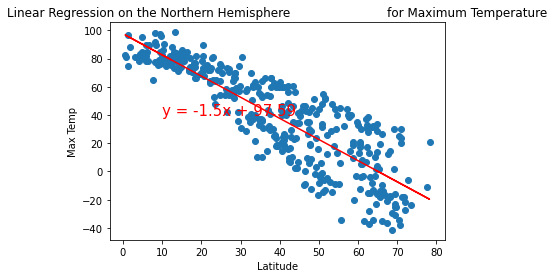

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

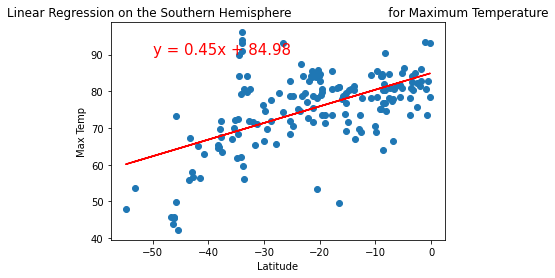

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

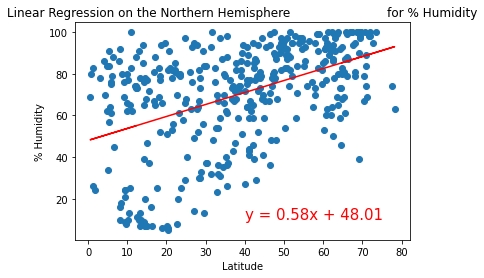

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

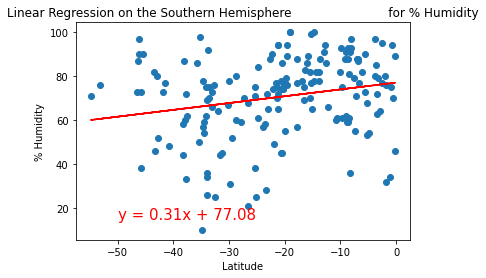

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

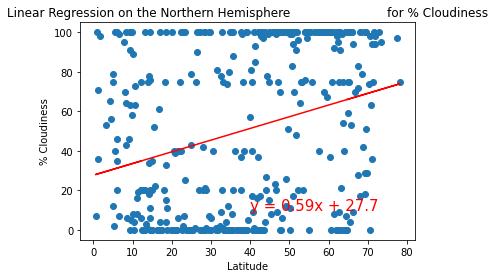

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

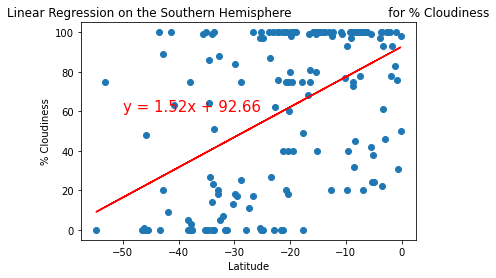

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

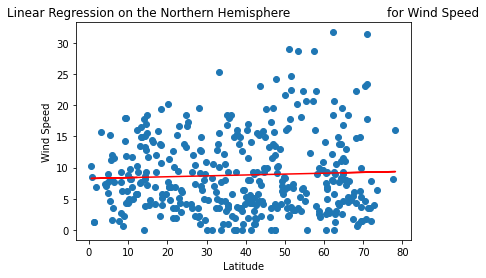

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

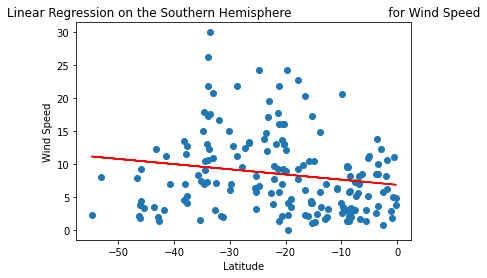

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))